# Improving existing Claims using Data Science techniques

<p style="font-size:120%;">To address the challenges mentioned by the business owner, we can utilize the provided dataset to build machine learning models that can help with the following:</p>

- Accurate and Consistent Cost Estimates: We will build a predictive model to estimate the ultimate incurred claim cost based on the features provided in the dataset. This model can help claims handlers make more accurate and consistent cost estimates.
- Identification of Complex Claims: Develop a model to classify claims as complex or not, which can help in triaging claims to the appropriate handlers early in the process. Complex claims can be defined as those with high ultimate costs or certain patterns in the data that indicate complexity.

<p style="font-size:120%;">Here is a step-by-step approach to tackle these problems:</p>

## Step 1: Data Exploration, Preprocessing and Visualization

### Import required Libraries

In [1]:
# Import required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from fastai.tabular.all import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

### Loading Data: Read Dataset and Inspect the data.csv file that is provided for training the model.

Dataset: Easy peasy: it's lemon squeezy
- Predict Workers Compensation claims using highly realistic synthetic data

In [2]:
# Read dataset
data = pd.read_csv('../01. Data/data.csv')
# Drop duplicates
data.drop_duplicates(inplace=True)
# Print shape
print('Number of rows and columns:', data.shape)

Number of rows and columns: (54000, 26)


In [3]:
# View top 5 rows to see if the data is loaded correctly. Transposed for a better view.
data.head().T

,0,1,2,3,4
ClaimNumber,WC8285054,WC6982224,WC5481426,WC9775968,WC2634037
DateTimeOfAccident,2002-04-09T07:00:00Z,1999-01-07T11:00:00Z,1996-03-25T00:00:00Z,2005-06-22T13:00:00Z,1990-08-29T08:00:00Z
DateReported,2002-07-05T00:00:00Z,1999-01-20T00:00:00Z,1996-04-14T00:00:00Z,2005-07-22T00:00:00Z,1990-09-27T00:00:00Z
Age,48,43,30,41,36
Gender,M,F,M,M,M
MaritalStatus,M,M,U,S,M
DependentChildren,0,0,0,0,0
DependentsOther,0,0,0,0,0
WeeklyWages,500.0,509.34,709.1,555.46,377.1
PartTimeFullTime,F,F,F,F,F


<p style="font-size:120%;">From the above we can infer that the dataset has 26 columns, including information about the claim, worker, and financial details. Here's a summary of the columns:</p>

- Claim Information:

    - ClaimNumber: Unique policy identifier
    - DateTimeOfAccident: Date and time of accident
    - DateReported: Date that accident was reported
    - ClaimDescriptionKeyword_1 to ClaimDescriptionKeyword_12: Keywords pointing out to useful claim descriptions
- Worker Information:

    - Age: Age of the worker
    - Gender: Gender of the worker
    - MaritalStatus: Marital status of the worker (M, S, U)
    - DependentChildren: Number of dependent children
    - DependentsOther: Number of dependents excluding children
    - WeeklyWages: Total weekly wage
    - PartTimeFullTime: Employment status (P, F)
    - HoursWorkedPerWeek: Total hours worked per week
    - DaysWorkedPerWeek: Number of days worked per week
- Financial Information:

    - InitialIncurredClaimsCost: Initial estimate by the insurer of the claim cost
    - UltimateIncurredClaimCost: Total claims payments by the insurance company (target variable)

### Exploratory Data Analysis (EDA)

We'll start by summarizing the main characteristics of the data, looking for missing values, outliers, and understanding the distribution of various features.

<p style="font-size:120%;">Summarize the Data</p>
Let's get a summary of the dataset to understand the distributions and identify any missing values.

In [4]:
# Summarize Nominal Statistical features 
data.describe(include=['object']).T

,count,unique,top,freq
ClaimNumber,54000,54000,WC8285054,1
DateTimeOfAccident,54000,36673,2001-05-01T14:00:00Z,9
DateReported,54000,6653,2001-03-29T00:00:00Z,25
Gender,54000,3,M,41660
MaritalStatus,53971,3,S,26161
PartTimeFullTime,54000,2,F,49112


In [5]:
# Summary statistics for all the features
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ClaimNumber,54000,54000,WC8285054,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateTimeOfAccident,54000,36673,2001-05-01T14:00:00Z,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateReported,54000,6653,2001-03-29T00:00:00Z,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,54000.0,NaN,NaN,NaN,33.84237,12.122165,13.0,23.0,32.0,43.0,81.0
Gender,54000,3,M,41660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,53971,3,S,26161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DependentChildren,54000.0,NaN,NaN,NaN,0.119185,0.51778,0.0,0.0,0.0,0.0,9.0
DependentsOther,54000.0,NaN,NaN,NaN,0.009944,0.109348,0.0,0.0,0.0,0.0,5.0
WeeklyWages,54000.0,NaN,NaN,NaN,416.364807,248.638669,1.0,200.0,392.2,500.0,7497.0
PartTimeFullTime,54000,2,F,49112,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above, we can get the following insights;
- The average UltimateIncurredClaimCost or Ultimate Claim Cost is around 11000. 
- The most expensive claim costs is around 4 million. 
We will soon take care of the cost distributions, but first deal with missing values and basic feature engineering.

<p style="font-size:120%;">Check for Missing Values</p>

We'll check for any missing values in the dataset.

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

ClaimNumber                    0
DateTimeOfAccident             0
DateReported                   0
Age                            0
Gender                         0
MaritalStatus                 29
DependentChildren              0
DependentsOther                0
WeeklyWages                    0
PartTimeFullTime               0
HoursWorkedPerWeek             0
DaysWorkedPerWeek              0
ClaimDescriptionKeyword_0      0
ClaimDescriptionKeyword_1      0
ClaimDescriptionKeyword_2      0
ClaimDescriptionKeyword_3      0
ClaimDescriptionKeyword_4      0
ClaimDescriptionKeyword_5      0
ClaimDescriptionKeyword_6      0
ClaimDescriptionKeyword_7      0
ClaimDescriptionKeyword_8      0
ClaimDescriptionKeyword_9      0
ClaimDescriptionKeyword_10     0
ClaimDescriptionKeyword_11     0
InitialIncurredClaimsCost      0
UltimateIncurredClaimCost      0
dtype: int64

<p style="font-size:120%;">Handle Missing values</p>

In [7]:
# MaritalStatus: Replace NaN with (U)nknown as mentioned in the dataset description
data['MaritalStatus'] = data['MaritalStatus'].fillna('U')
# Calculate group Statistics
data['UltimateIncurredClaimCost'].groupby(data['MaritalStatus']).agg(['count','median','mean'])

,count,median,mean
MaritalStatus,,,
M,22516,4166.460054,12024.933597
S,26161,2322.799731,9105.578095
U,5323,5828.918048,16009.299588


<p style="font-size:120%;">Distribution of Features</p>

We'll look at the distribution of some key numerical features.

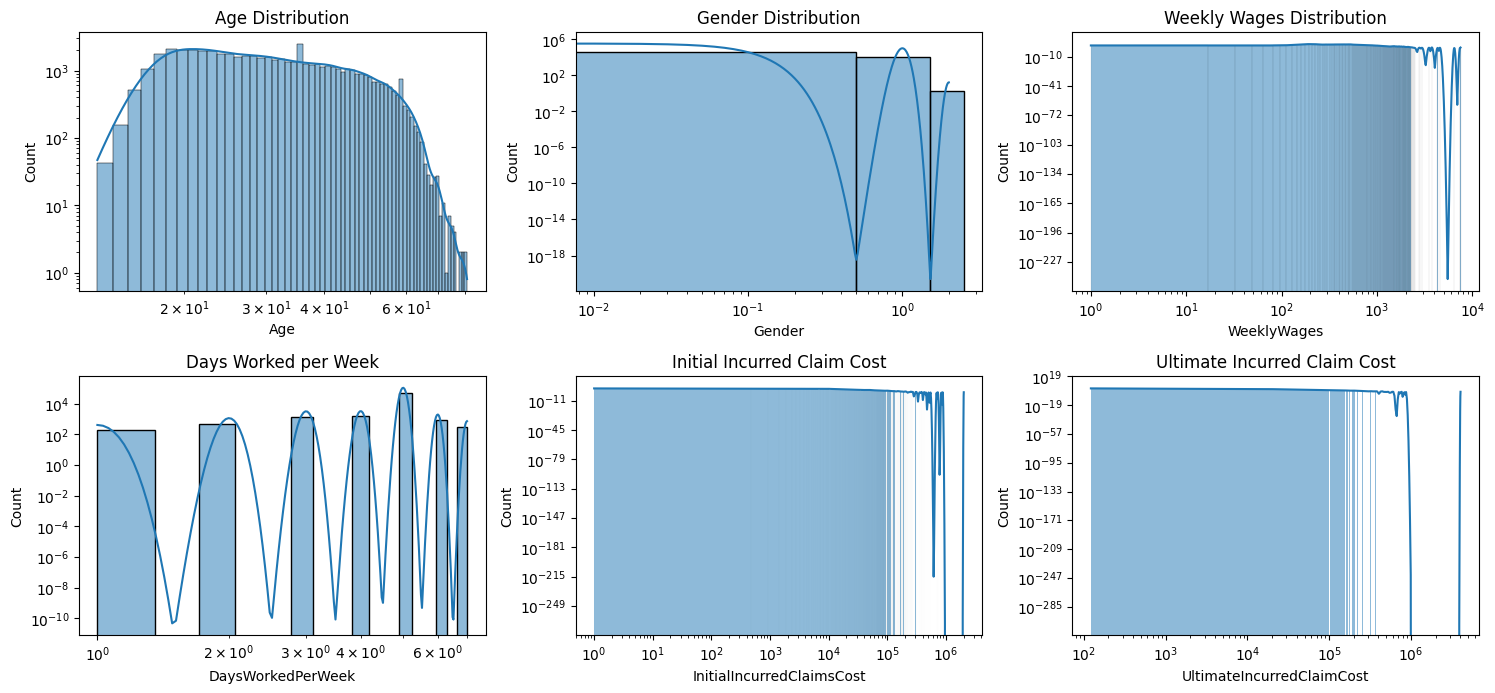

In [8]:
# Distribution of age, gender, weekly wages, initial incurred claim cost, and ultimate incurred claim cost
# Define size and grid spec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig)

ax = fig.add_subplot(gs[0, 0])
sns.histplot(data = data, x = 'Age', kde=True, ax = ax)
plt.title('Age Distribution')
ax.set(yscale = 'log',
       xscale = 'log')

ax = fig.add_subplot(gs[0, 1])
sns.histplot(data = data, x = 'Gender', kde=True, ax = ax)
plt.title('Gender Distribution')
ax.set(yscale = 'log',
       xscale = 'log')

ax = fig.add_subplot(gs[0, 2])
sns.histplot(data = data, x = 'WeeklyWages', kde=True, ax = ax)
plt.title('Weekly Wages Distribution')
ax.set(yscale = 'log',
       xscale = 'log')

ax = fig.add_subplot(gs[1, 0])
sns.histplot(data = data, x = 'DaysWorkedPerWeek', kde=True, ax = ax)
plt.title('Days Worked per Week')
ax.set(yscale = 'log',
       xscale = 'log')

ax = fig.add_subplot(gs[1, 1])
sns.histplot(data = data, x = 'InitialIncurredClaimsCost', kde=True, ax = ax)
plt.title('Initial Incurred Claim Cost')
ax.set(yscale = 'log',
       xscale = 'log')

ax = fig.add_subplot(gs[1, 2])
sns.histplot(data = data, x = 'UltimateIncurredClaimCost', kde=True, ax = ax)
plt.title('Ultimate Incurred Claim Cost')
ax.set(yscale = 'log',
       xscale = 'log')

plt.tight_layout()
plt.show()

<p style="font-size:120%;">Now analyse the relation between the above plots to the Ultimate Incurred Claim Cost.</p>

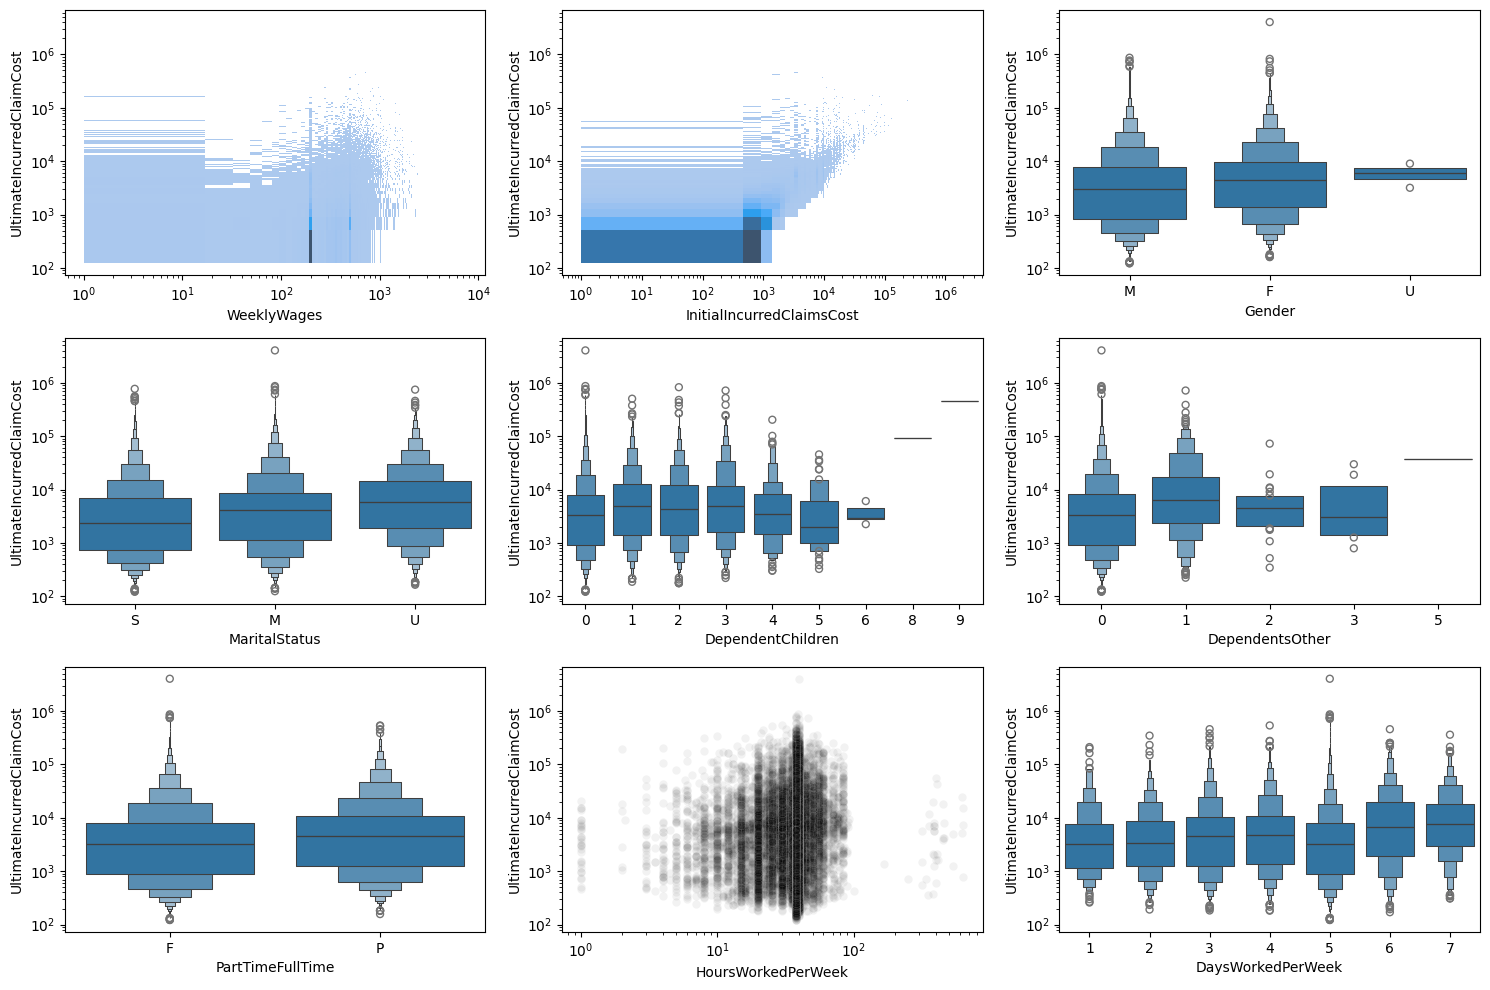

In [9]:
# Define size and grid spec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig)

ax = fig.add_subplot(gs[0, 0])
sns.histplot(data = data, x = 'WeeklyWages', y = 'UltimateIncurredClaimCost',
                ax = ax)
ax.set(yscale = 'log',
       xscale = 'log')

ax = fig.add_subplot(gs[0, 1])
sns.histplot(data = data, x = 'InitialIncurredClaimsCost', y = 'UltimateIncurredClaimCost',
                ax = ax)
ax.set(yscale = 'log',
       xscale = 'log')

ax = fig.add_subplot(gs[0, 2])
sns.boxenplot(data = data, x = 'Gender', y = 'UltimateIncurredClaimCost',
              ax = ax)
ax.set(yscale = 'log')

ax = fig.add_subplot(gs[1, 0])
sns.boxenplot(data = data, x = 'MaritalStatus', y = 'UltimateIncurredClaimCost',
              order = ['S', 'M', 'U'],
              ax = ax)
ax.set(yscale = 'log')

ax = fig.add_subplot(gs[1, 1])
sns.boxenplot(data = data, x = 'DependentChildren', y = 'UltimateIncurredClaimCost',
              ax = ax)
ax.set(yscale = 'log')

ax = fig.add_subplot(gs[1, 2])
sns.boxenplot(data = data, x = 'DependentsOther', y = 'UltimateIncurredClaimCost',
              ax = ax)
ax.set(yscale = 'log')

ax = fig.add_subplot(gs[2, 0])
sns.boxenplot(data = data, x = 'PartTimeFullTime', y = 'UltimateIncurredClaimCost',
              ax = ax)
ax.set(yscale = 'log')

ax = fig.add_subplot(gs[2, 1])
sns.scatterplot(data = data, x = 'HoursWorkedPerWeek', y = 'UltimateIncurredClaimCost',
                alpha = 0.05, color = 'black',
                ax = ax)
ax.set(yscale = 'log',
       xscale = 'log')

ax = fig.add_subplot(gs[2, 2])
sns.boxenplot(data = data, x = 'DaysWorkedPerWeek', y = 'UltimateIncurredClaimCost',
              ax = ax)
ax.set(yscale = 'log')

plt.tight_layout()
plt.show()


<p style="font-size:120%;">Visualize all the 12 claim description keywords in separate graphs.</p>

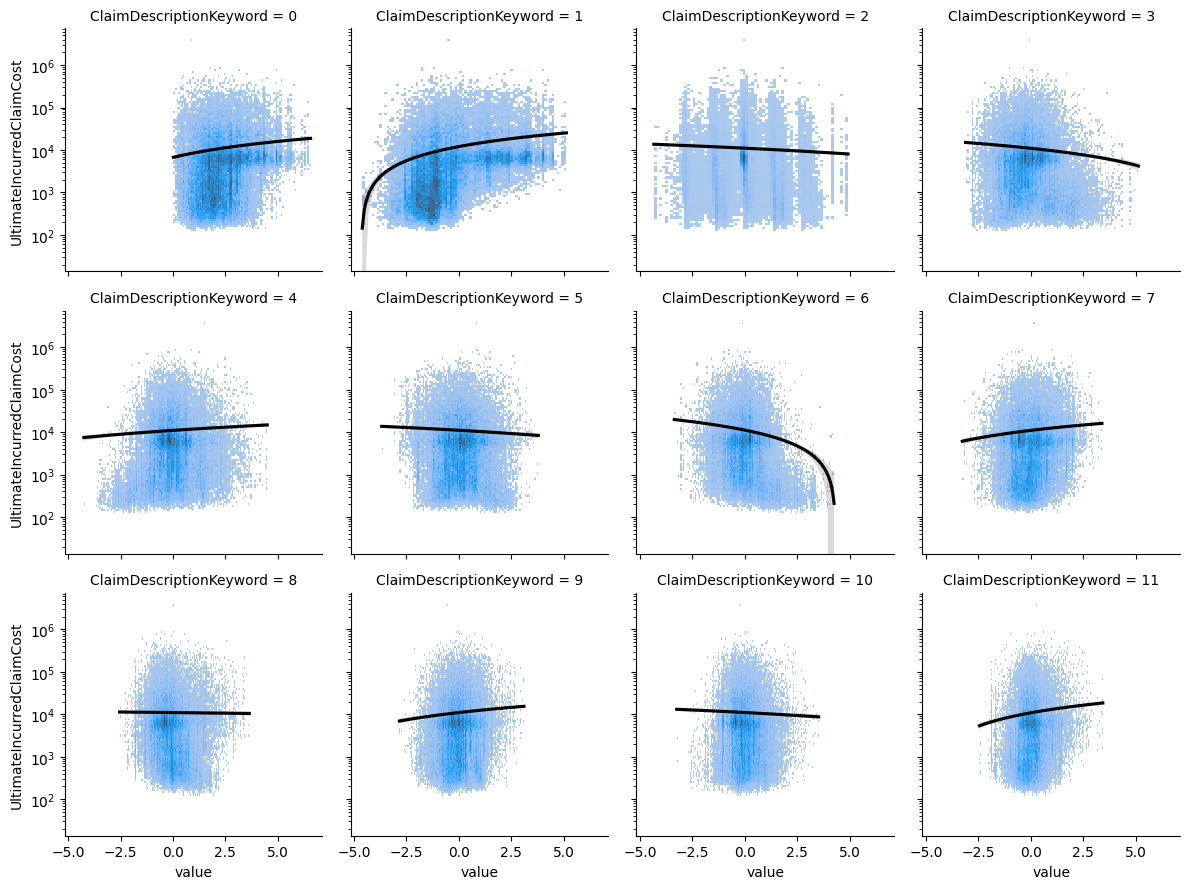

In [10]:
keywords = data.loc[:, data.columns.str.contains('ClaimDescriptionKeyword_')]
multiplot = pd.concat([keywords, data['UltimateIncurredClaimCost']], axis = 1).melt(id_vars = 'UltimateIncurredClaimCost')
multiplot['variable'] = multiplot['variable'].str.lstrip("ClaimDescriptionKeyword_")
multiplot = multiplot.rename(columns = {'variable': 'ClaimDescriptionKeyword'})

g = sns.FacetGrid(multiplot, col = 'ClaimDescriptionKeyword', col_wrap = 4)
g.set(yscale ='log')
g.map(sns.histplot, 'value', 'UltimateIncurredClaimCost')
g.map(sns.regplot, 'value', 'UltimateIncurredClaimCost', scatter = False, line_kws = {'color': 'black'})
plt.show()

From the above graphs, most of them does not show clear relationships

<p style="font-size:120%;">Correlation Matrix</p>

To understand the relationships between different numerical features, we will create a correlation matrix.

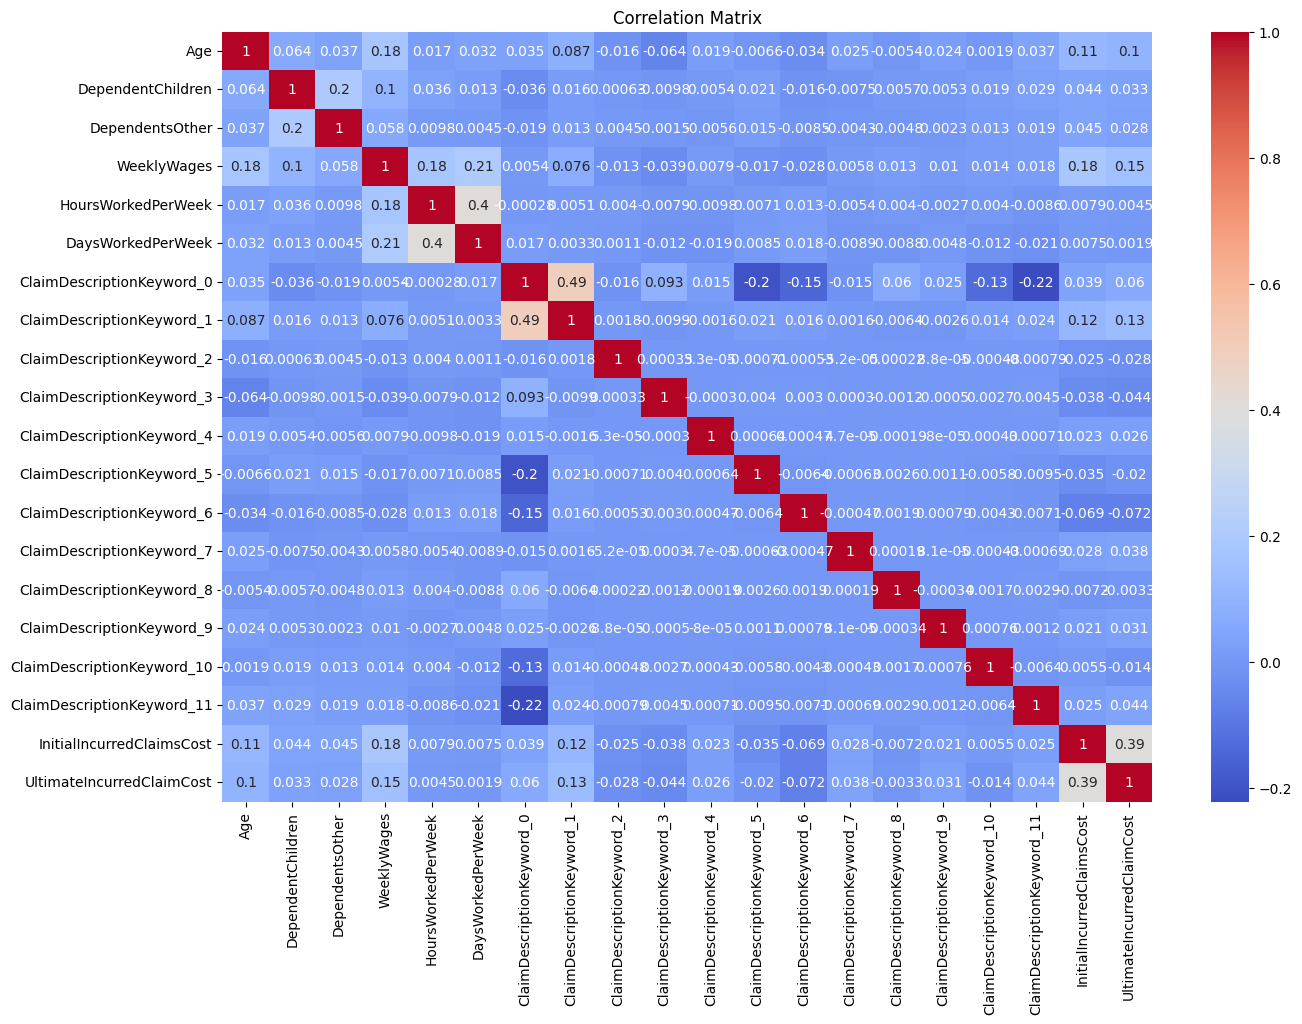

In [11]:
# Correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

Based on the insights from EDA, we can engineer new features that might help improve the model's performance. Examples include deriving the time between the accident and reporting date, and creating dummy variables for categorical features.

<p style="font-size:120%;">Create Derived Features</p>

In [12]:
# Claim Number seems to incrment with each entry. So, Extract number by removing first 2 letters.  
data['ClaimNumberInt'] = data['ClaimNumber'].str[2:].astype(int)

# Generate Some date features
data['YearOfAccident']  = pd.DatetimeIndex(data['DateTimeOfAccident']).year
data['MonthOfAccident']  = pd.DatetimeIndex(data['DateTimeOfAccident']).month
data['DayOfAccident']  = pd.DatetimeIndex(data['DateTimeOfAccident']).day
# data['WeekdayOfAccident']  = pd.DatetimeIndex(data['DateTimeOfAccident']).day_name()
data['HourOfAccident']  = pd.DatetimeIndex(data['DateTimeOfAccident']).hour
data['YearReported']  = pd.DatetimeIndex(data['DateReported']).year

# Reporting delay in weeks 
data['DaysReportDelay'] = pd.DatetimeIndex(data['DateReported']).date - pd.DatetimeIndex(data['DateTimeOfAccident']).date
data['DaysReportDelay'] = (data['DaysReportDelay']  / np.timedelta64(1, 'D')).astype(int)
data['WeeksReportDelay'] = np.floor(data['DaysReportDelay'] / 7.).astype(int)
data['WeeksReportDelay'] = np.clip(data['WeeksReportDelay'], a_max=55, a_min=None)

# drop unneccessary columns
data.drop(['ClaimNumber','DateTimeOfAccident','DaysReportDelay','DateReported'],axis=1,inplace=True)
data.shape

(54000, 30)

<p style="font-size:120%;">One-Hot Encoding for Categorical Features</p>

In [13]:
# One-hot encoding for categorical variables
encoded_data = pd.get_dummies(data, columns=['Gender', 'MaritalStatus', 'PartTimeFullTime'], drop_first=True)

In [14]:
encoded_data.head().T

,0,1,2,3,4
Age,4.800000e+01,4.300000e+01,3.000000e+01,4.100000e+01,3.600000e+01
DependentChildren,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DependentsOther,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
WeeklyWages,5.000000e+02,5.093400e+02,7.091000e+02,5.554600e+02,3.771000e+02
HoursWorkedPerWeek,3.800000e+01,3.750000e+01,3.800000e+01,3.800000e+01,3.800000e+01
DaysWorkedPerWeek,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
ClaimDescriptionKeyword_0,2.254325e+00,2.356002e+00,8.176850e-01,4.022864e+00,3.383056e+00
ClaimDescriptionKeyword_1,-1.466085e+00,-1.259903e+00,-1.088115e+00,3.184172e+00,9.940831e-03
ClaimDescriptionKeyword_2,-1.278155e+00,1.490410e+00,1.520340e+00,-1.460350e-02,1.691871e+00
ClaimDescriptionKeyword_3,-4.221646e-01,-8.184667e-01,-2.330312e-01,1.219356e+00,-1.390378e+00


<p style="font-size:120%;">Perform analysis for Skewness</p>

In [15]:
encoded_data.skew(numeric_only=True)

Age                             0.536341
DependentChildren               5.112379
DependentsOther                13.706834
WeeklyWages                     4.122767
HoursWorkedPerWeek             24.132974
DaysWorkedPerWeek              -3.340468
ClaimDescriptionKeyword_0       0.614085
ClaimDescriptionKeyword_1       0.864677
ClaimDescriptionKeyword_2       0.110680
ClaimDescriptionKeyword_3       0.517783
ClaimDescriptionKeyword_4       0.278185
ClaimDescriptionKeyword_5       0.114405
ClaimDescriptionKeyword_6       0.516322
ClaimDescriptionKeyword_7       0.258289
ClaimDescriptionKeyword_8       0.531075
ClaimDescriptionKeyword_9       0.191864
ClaimDescriptionKeyword_10      0.335799
ClaimDescriptionKeyword_11      0.405564
InitialIncurredClaimsCost      26.853657
UltimateIncurredClaimCost      37.552504
ClaimNumberInt                 -0.010469
YearOfAccident                 -0.002754
MonthOfAccident                -0.002307
DayOfAccident                   0.020881
HourOfAccident  

'HoursWorkedPerWeek' is probably affected by wrong values (>168hours) and 'DependentsOther' might be influenced by outliers.

As expected claim costs are strongly right-skewed. Thus a first basic log-transform:


If we want the original value,
```
import numpy as np

# Assuming 'encoded_data' is your DataFrame and 'LogUltimateIncurredClaimCost' contains the log-transformed values

# Apply the exponential function to get the original values
encoded_data["OriginalUltimateIncurredClaimCost"] = np.expm1(encoded_data["LogUltimateIncurredClaimCost"])

# The 'OriginalUltimateIncurredClaimCost' column will now contain the original values
```

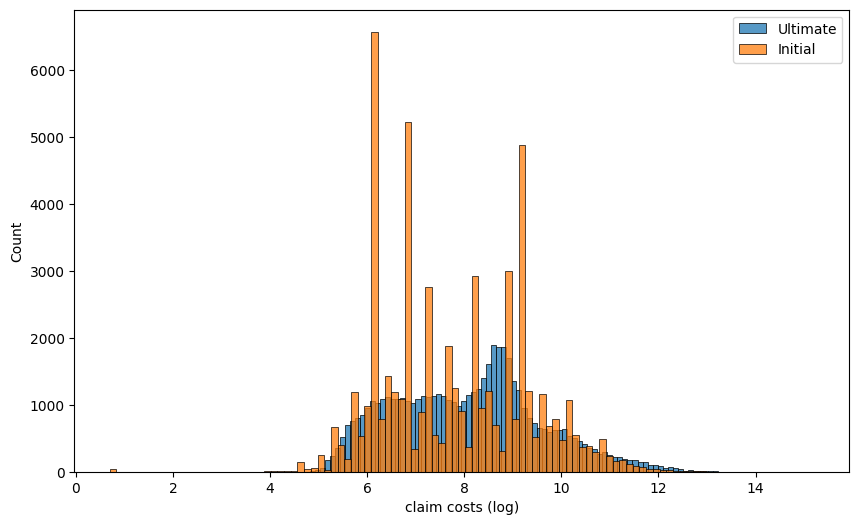

In [16]:
# The log1p function applies log(1+x) to all elements of the column
encoded_data["LogUltimateIncurredClaimCost"] = np.log1p(encoded_data["UltimateIncurredClaimCost"])
encoded_data["LogInitialIncurredClaimsCost"] = np.log1p(encoded_data["InitialIncurredClaimsCost"])

# plot distribution: claim costs (log)
plt.subplots(figsize=(10, 6))
sns.histplot(encoded_data.LogUltimateIncurredClaimCost, kde=False, label='Ultimate',bins=100)
sns.histplot(encoded_data.LogInitialIncurredClaimsCost, kde=False, label='Initial', bins=100)
plt.xlabel('claim costs (log)')
plt.legend()
plt.show()

There are some spikes in the initial cost distribution. Lets' see if there is interesting information in it:

In [17]:
# Search for frequent initial costs and calculate some statistics for ultimate costs (mean)
encoded_data['UltimateIncurredClaimCost'].groupby(encoded_data['InitialIncurredClaimsCost']).agg(['mean','median','min','count']).query('count >= 2000')

,mean,median,min,count
InitialIncurredClaimsCost,,,,
500,1234.309657,514.491131,138.475198,6260
1000,1984.477149,975.563918,289.452746,4587
1500,4488.058672,2094.668686,614.644223,2329
3500,9691.465926,5659.889398,1238.853926,2600
7500,11128.475071,6137.809281,2222.464496,2507
10000,11858.388278,7313.963420,2294.230002,3453


In [18]:
# Average cost factor Ultimate / Initial
encoded_data.UltimateIncurredClaimCost.sum() / encoded_data.InitialIncurredClaimsCost.sum()

1.4032858389509015

The average ultimate costs of frequent low initial costs (500,1000,1500,3500) are by a factor of 2 to 3 higher and thus remarkably higher than average (1.40).

Let's see if there is a pattern in the scatter plot inital vs. ultimate costs:

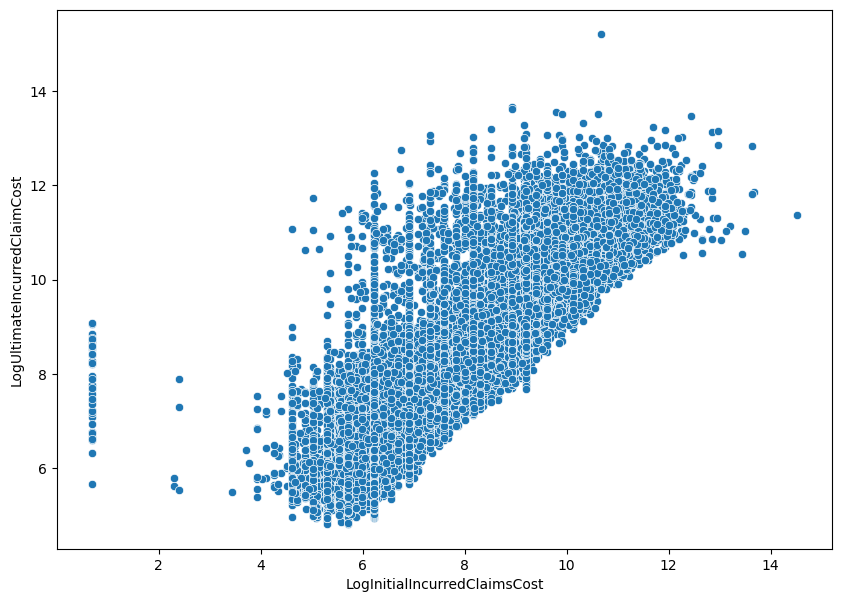

In [19]:
# Scatter plot: claim costs (log)
plt.subplots(figsize=(10, 7))
sns.scatterplot(data=encoded_data, x="LogInitialIncurredClaimsCost",y="LogUltimateIncurredClaimCost")
plt.show()

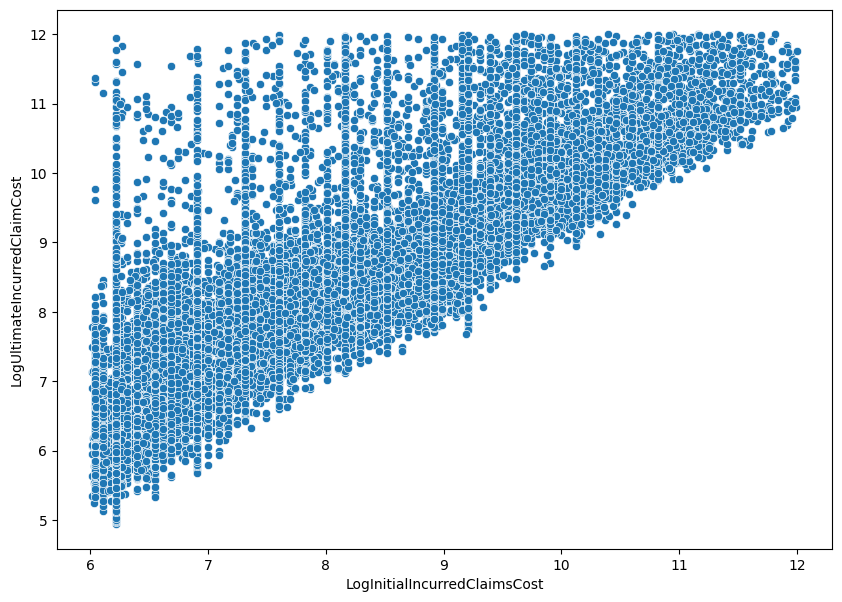

In [20]:
# Scatter plot: zoom into claim costs (log)
plt.subplots(figsize=(10, 7))
sns.scatterplot(data=encoded_data.query('LogInitialIncurredClaimsCost > 6 and LogInitialIncurredClaimsCost < 12 and LogUltimateIncurredClaimCost < 12'), x="LogInitialIncurredClaimsCost",y="LogUltimateIncurredClaimCost")
plt.show()

This could lead to an additional "lower limit" modeling requirement

<p style="font-size:120%;">Visualize Claim Number</p>

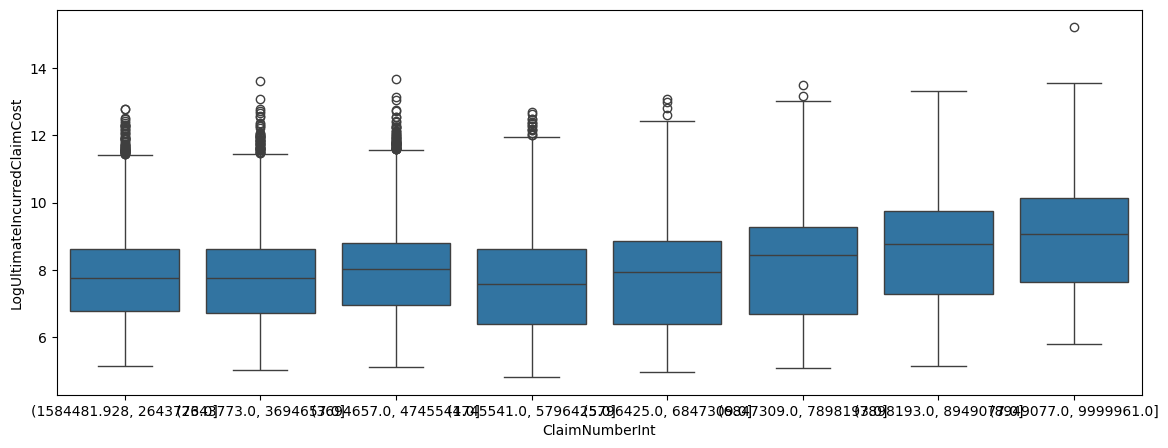

In [21]:
# List of features with too many different values
num_list_bins =['ClaimNumberInt']

# plot binned plot boxplots for 'LogUltimateIncurredClaimCost'
for name in num_list_bins:
    f, ax = plt.subplots(figsize=(14, 5))
    encoded_data['bin_'] = pd.cut(encoded_data[name], 8)
    sns.boxplot(x='bin_', y='LogUltimateIncurredClaimCost', data=encoded_data)
    plt.xlabel(name)
    plt.show()

encoded_data.drop(['bin_'],axis=1,inplace=True)

## Step 2: Predictive Modelling - The Cost Estimation Model

Our claims handlers spend a lot of time going through the claims characteristics and put cost estimates in the system. It is important that we get accurate estimates because these impact our reserves. Our estimates today are not very accurate and consistent and we have to modify them regularly.

<p style="font-size:120%;">Splitting the Data</p>

We'll start by splitting the data into training and testing sets to evaluate the model's performance.

In [22]:
# Define the features and target variable
X = encoded_data.drop(columns=['UltimateIncurredClaimCost', 'LogUltimateIncurredClaimCost', 'InitialIncurredClaimsCost', 'ClaimNumberInt'])
y = encoded_data['LogUltimateIncurredClaimCost']

# Split the encoded_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<p style="font-size:120%;">Model Training</p>

We'll train multiple regression models to predict UltimateIncurredClaimCost. We'll start with a simple linear regression model, followed by more complex models like Decision Tree and Random Forest.

In [23]:
# Initialize the models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

In [24]:
# Train Linear Regression models
linear_regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Train a Decision Tree
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
# Random forest model
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<p style="font-size:120%;">Model Evaluation</p>

We'll evaluate the models using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Coefficient of Determination (R²).


- MAE: Provides the average absolute error between predicted and actual values.
- MSE: Measures the average squared difference between predicted and actual values.
- R²: Indicates the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R² value indicates a better fit of the model to the data.


In [27]:
# Make predictions on the test set
y_pred_lr = linear_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Evaluate Linear Regression
mae_lr, mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

# Evaluate Decision Tree
mae_dt, mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)

# Evaluate Random Forest
mae_rf, mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

# Compile the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R²': [r2_lr, r2_dt, r2_rf]
})

# Display the results
results

,Model,MAE,MSE,R²
0,Linear Regression,0.448059,0.445721,0.809211
1,Decision Tree,0.557278,0.757889,0.675588
2,Random Forest,0.387037,0.363701,0.844319


We can see that the Random Forest model typically provides better performance compared to Linear Regression and Decision Tree models. It usually has lower MAE, MSE, and higher R² values, indicating better predictive accuracy.

<p style="font-size:120%;">Hyperparameter Tuning and Feature Importance Analysis:</p>

Hyperparameter Tuning for Random Forest

We'll use GridSearchCV to find the best hyperparameters for the Random Forest model

In [34]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

<p style="font-size:120%;">Train the Best Model</p>

Using the best parameters from GridSearchCV, we'll train the Random Forest model again.

In [35]:
# Train the Random Forest with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [36]:
# Make predictions
y_pred_best_rf = best_rf.predict(X_test)

In [37]:
# Evaluate the best model
mae_best_rf, mse_best_rf, r2_best_rf = evaluate_model(y_test, y_pred_best_rf)

In [38]:
# Display the evaluation metrics
best_model_results = pd.DataFrame({
    'Model': ['Best Random Forest'],
    'MAE': [mae_best_rf],
    'MSE': [mse_best_rf],
    'R²': [r2_best_rf]
})

In [39]:
best_model_results

,Model,MAE,MSE,R²
0,Best Random Forest,0.376136,0.353459,0.848703


<p style="font-size:120%;">Using fastai for Model Training</p>

In [28]:
fastai_data = encoded_data.drop(columns=['UltimateIncurredClaimCost', 'InitialIncurredClaimsCost', 'ClaimNumberInt'])

# Prepare the data for fastai
procs = [Categorify, FillMissing, Normalize]
dep_var = 'LogUltimateIncurredClaimCost'
cont, cat = cont_cat_split(fastai_data, dep_var=dep_var)

# Splitting the fastai_data into training and validation sets
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(fastai_data))

# Creating the TabularDataLoaders
dls = TabularDataLoaders.from_df(fastai_data, procs=procs, cat_names=cat, cont_names=cont, 
                                 y_names=dep_var, splits=splits)


epoch,train_loss,valid_loss,_rmse,time
0,0.516134,0.574435,0.757915,00:06
1,0.500817,0.403784,0.635440,00:06
2,0.438292,0.410187,0.640458,00:07
3,0.424840,0.362747,0.602285,00:07
4,0.390032,0.359073,0.599227,00:08


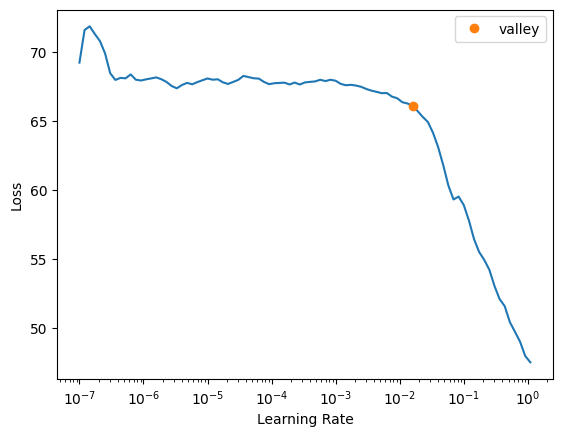

In [32]:
# Define the tabular learner
learn = tabular_learner(dls, metrics=rmse)

# Find the optimal learning rate
learn.lr_find()

# Train the model
learn.fit_one_cycle(5, 1e-2)

In [33]:
# Make predictions
test_dl = learn.dls.test_dl(X_test)
preds, _ = learn.get_preds(dl=test_dl)
y_pred_fastai = preds.numpy().flatten()

# Evaluate the fastai model
mae_fastai, mse_fastai, r2_fastai = evaluate_model(y_test, y_pred_fastai)

# Compile the results
fastai_results = pd.DataFrame({
    'Model': ['fastai'],
    'MAE': [mae_fastai],
    'MSE': [mse_fastai],
    'R²': [r2_fastai]
})

# Display the results
fastai_results


,Model,MAE,MSE,R²
0,fastai,0.368278,0.345636,0.852051


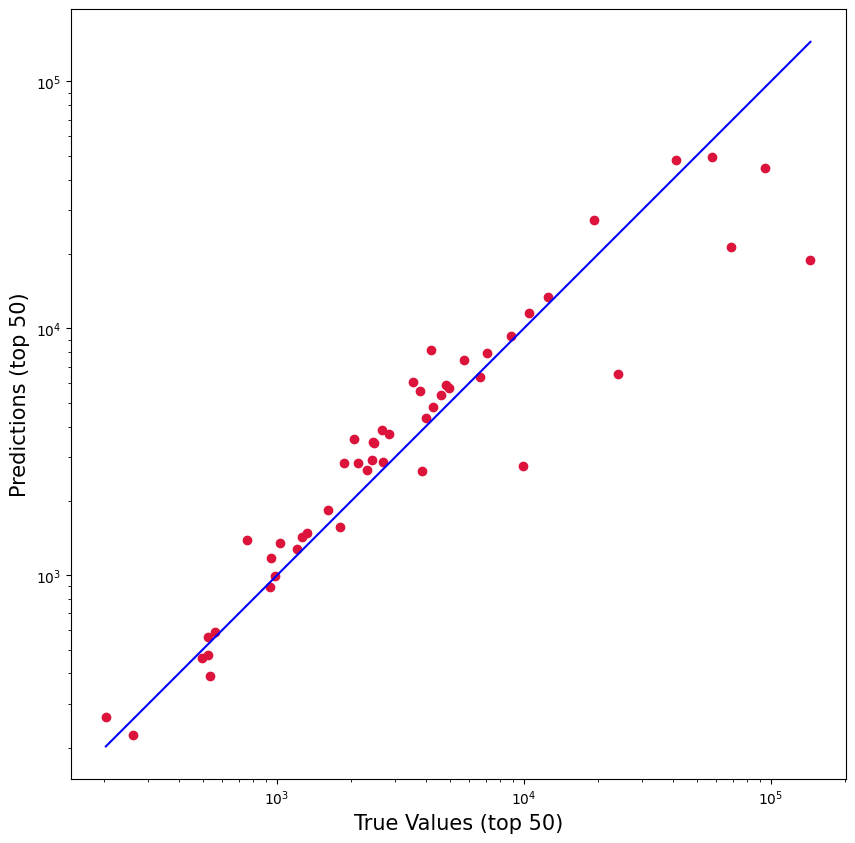

In [34]:
# Visualize Test Data to Fastai predictions
true_value = np.expm1(y_test.to_list())[:50]
predicted_value = np.expm1(y_pred_fastai)[:50]

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (top 50)', fontsize=15)
plt.ylabel('Predictions (top 50)', fontsize=15)
plt.axis('equal')
plt.show()

# The Complex Claims Detection Model

Business Problem: It is very hard to identify complex claims and triage them to the right people. It would be nice if we can detect these complex claims early and get them to the right claims handlers to manage.

In [35]:
# Define complex claims based on criteria (example: high ultimate cost)
complex_claim_threshold = y.quantile(np.log1p(0.7))
encoded_data['ComplexClaim'] = (encoded_data['LogUltimateIncurredClaimCost'] > complex_claim_threshold).astype(int)

# Define feature set and target variable
X = encoded_data.drop(columns=['UltimateIncurredClaimCost', 'ComplexClaim', 'ClaimNumberInt'])
y = encoded_data['ComplexClaim']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)


i:\07. Company\02. Suncorp\02. Data Analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [36]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")

# ROC curve visualization
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5725
           1       0.94      0.92      0.93      5075

    accuracy                           0.93     10800
   macro avg       0.93      0.93      0.93     10800
weighted avg       0.93      0.93      0.93     10800

ROC AUC Score: 0.931768021167208


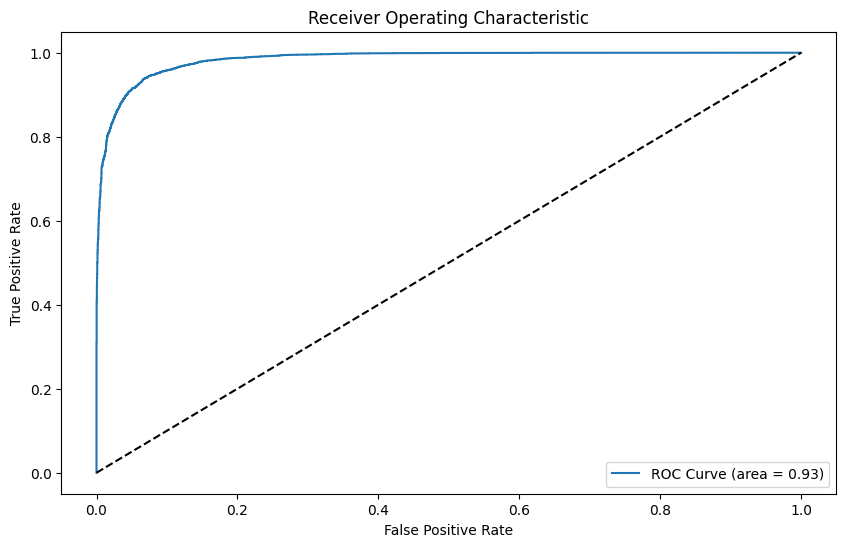

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()

These steps will help you develop models to improve the claims process. We can further refine these models, perform hyperparameter tuning, and ensure they are robust before deploying them.

# A Generative AI way of doing things - Sneak peek

Used PandasAI that uses a generative AI model to understand and interpret natural language queries and translate them into python code and SQL queries. It then uses the code to interact with the data and return the results to the user.

Can also be done using OpenAI Assistants API in a secured way while dealing with the Client data.

In [31]:
import os
import pandas as pd
from pandasai import Agent

# Sample DataFrame
sales_by_country = data

# By default, unless you choose a different LLM, it will use BambooLLM.
os.environ["PANDASAI_API_KEY"] = ""

agent = Agent(sales_by_country)
agent.chat('Which are the top 5 claims by UltimateIncurredClaimCost?')

,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescriptionKeyword_0,...,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost,ClaimNumberInt,YearOfAccident,MonthOfAccident,DayOfAccident,HourOfAccident,YearReported,WeeksReportDelay
11027,51,F,M,0,0,390.00,F,40.0,5,0.864189,...,0.261156,43000,4.027136e+06,9916019,2005,12,13,18,2006,4
23036,37,M,M,0,0,200.00,F,39.0,5,2.236719,...,0.622090,7500,8.657706e+05,4540054,1994,9,22,20,1994,9
37813,55,F,M,2,0,474.38,F,38.0,5,1.758867,...,1.107868,7500,8.237063e+05,2854573,1990,3,12,17,1990,1
3193,40,M,S,0,0,523.47,F,38.0,5,3.141434,...,0.175423,17880,7.684851e+05,8981820,2003,2,27,10,2003,4
923,27,M,U,0,0,801.54,F,46.5,5,2.046016,...,-0.960285,40456,7.420032e+05,9097605,2004,6,25,14,2004,8
